In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv(r'C:\data set\Fraud.csv')

In [26]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [27]:
df.shape

(6362620, 11)

In [28]:
df['step'].nunique()

743

In [29]:
df['isFraud'].unique()

array([0, 1], dtype=int64)

In [30]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [31]:
df['isFlaggedFraud'].unique()

array([0, 1], dtype=int64)

In [32]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [33]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [34]:
df['nameOrig'].nunique()

6353307

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.isna(),cmap='Pastel1_r')

<AxesSubplot:>

In [ ]:
df.isna().sum()

fig, ax = plt.subplots(1,3, figsize=(15,7))
sns.distplot(df['amount'], ax=ax[0])
ax[0].set_title('Distribution of Transaction Amount')

sns.distplot(df['oldbalanceOrg'], ax=ax[1])
ax[1].set_title('Distribution of oldbalanceOrg')

sns.distplot(df['newbalanceOrig'], ax=ax[2])
ax[2].set_title('Distribution of newbalanceOrig')

In [35]:
df.drop(['nameOrig','nameDest'],axis=1, inplace=True)

In [36]:
df.shape

(6362620, 9)

<AxesSubplot:xlabel='isFraud', ylabel='count'>

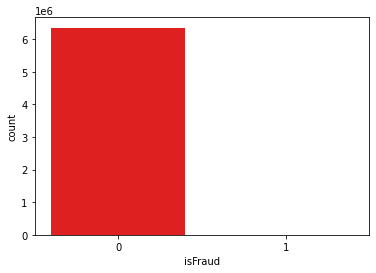

In [37]:
sns.countplot(df['isFraud'], palette=['r','b'])

In [38]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [39]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['isFraud'] == 1]
non_fraud_df = df.loc[df['isFraud'] == 0][:8213]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
907889,43,CASH_IN,317138.19,6384888.60,6702026.79,882608.18,565469.98,0,0
4641940,330,CASH_IN,261196.06,21519.00,282715.06,8947.08,0.00,0,0
4516023,325,TRANSFER,441873.49,441873.49,0.00,0.00,0.00,1,0
6117977,531,CASH_OUT,4791.06,4791.06,0.00,4814602.17,4819393.23,1,0
2755032,212,TRANSFER,362631.05,362631.05,0.00,0.00,0.00,1,0


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: isFraud, dtype: float64


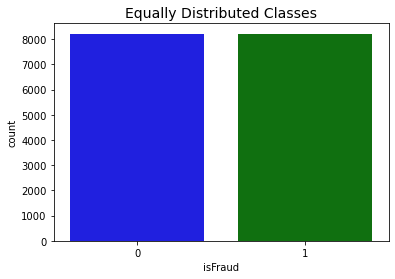

In [40]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['isFraud'].value_counts()/len(new_df))



sns.countplot('isFraud', data=new_df, palette=['b','g'])
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [41]:
new_df['isFraud'].value_counts()

1    8213
0    8213
Name: isFraud, dtype: int64

In [42]:
new_df.shape

(16426, 9)

In [43]:
new_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
907889,43,CASH_IN,317138.19,6384888.60,6702026.79,882608.18,565469.98,0,0
4641940,330,CASH_IN,261196.06,21519.00,282715.06,8947.08,0.00,0,0
4516023,325,TRANSFER,441873.49,441873.49,0.00,0.00,0.00,1,0
6117977,531,CASH_OUT,4791.06,4791.06,0.00,4814602.17,4819393.23,1,0
2755032,212,TRANSFER,362631.05,362631.05,0.00,0.00,0.00,1,0


In [44]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
new_df['type'] = lb.fit_transform(new_df['type'])

In [48]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
new_df['amount'] = rs.fit_transform(new_df['amount'].values.reshape(-1,1))
new_df['oldbalanceOrg'] = rs.fit_transform(new_df['oldbalanceOrg'].values.reshape(-1,1))
new_df['oldbalanceDest'] = rs.fit_transform(new_df['oldbalanceDest'].values.reshape(-1,1))
new_df['newbalanceDest'] = rs.fit_transform(new_df['newbalanceDest'].values.reshape(-1,1))
new_df['step'] = rs.fit_transform(new_df['step'].values.reshape(-1,1))


In [50]:
new_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
907889,-0.975510,0,0.284854,7.969240,6702026.79,1.704259,0.405043,0,0
4641940,0.195918,0,0.173783,-0.123424,282715.06,0.017276,-0.117482,0,0
4516023,0.175510,4,0.532511,0.411165,0.00,0.000000,-0.117482,1,0
6117977,1.016327,1,-0.335299,-0.144698,0.00,9.296682,4.335902,1,0
2755032,-0.285714,4,0.375178,0.310388,0.00,0.000000,-0.117482,1,0


In [54]:
x = new_df.drop(['isFraud'],axis=1)
y = new_df['isFraud']

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=145)

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [59]:
accuracy_score(y_test,model.predict(x_test))

0.7643048453859265

In [60]:
accuracy_score(y_train,model.predict(x_train))

0.7588278269340044

In [68]:
import statsmodels.formula.api as smf
model11 = smf.ols(formula='y~x',data=new_df).fit()

In [69]:
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     979.4
Date:                Wed, 07 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:18:30   Log-Likelihood:                -8717.3
No. Observations:               16426   AIC:                         1.745e+04
Df Residuals:                   16417   BIC:                         1.752e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3211      0.006     51.225      0.000       0.309       0.333
x[0]           0.1534      0.004     36.918      0.000       0.145       0.162
x[1]           0.0637      0.002     26.260      0.000       0.059       0.068
x[2]          -0.1356      0.005    -28.280      0.000      -0.145      -0.126
x[3]           0.2696      0.007     37.934      0.000       0.256       0.284
x[4]        -3.61e-07   8.98e-09    -40.209      0.000   -3.79e-07   -3.43e-07
x[5]          -0.0145      0.002     -7.879      0.000      -0.018      -0.011
x[6]           0.0304      0.004      8.257      0.000       0.023       0.038
x[7]           1.7124      0.112     15.245      0.000       1.492       1.933
==============================================================================
Omnibus:                     1010.677   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              486.666
Skew:                           0.236   Prob(JB):                    2.10e-106
Kurtosis:                       2.301   Cond. No.                     9.12e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.12e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [71]:
accuracy_score(y_test,rf.predict(x_test))

0.9907475042610178

In [72]:
accuracy_score(y_train,rf.predict(x_train))

1.0

In [73]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [74]:
accuracy_score(y_test,gb.predict(x_test))

0.5471146822498174

In [75]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [76]:
accuracy_score(y_test,dt.predict(x_test))

0.988799610421232

In [77]:
accuracy_score(y_train,dt.predict(x_train))

1.0

In [111]:
from xgboost import XGBClassifier

In [137]:
xgb = XGBClassifier(max_depth=4, learning_rate=0.01)

In [138]:
xgb.fit(x_train,y_train)

[00:34:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [139]:
accuracy_score(y_test,dt.predict(x_test).round())

0.988799610421232

In [140]:
accuracy_score(y_train,xgb.predict(x_train).round())

0.9803555483399626